Dashboard = https://public.tableau.com/views/CreditCard_17526778396820/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# 1. Introduction

==========================================

**Nama Data Analyst**  : Bagus Dwira Palguna

==========================================

# 2. Problem Statement

**Dataset**

Sumber dataset : https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv


**Topik Permasaahan**

Credit Card Application Data and Credit Record Data Analysis

**Latar Belakang**

Sebuah bank bernama American Bank of Consumer (ABC) adalah salah satu bank konsumen di USA. Direktur bisnis mereka ingin mengetahui informasi pengajuan dan penggunaan fasilitas credit card (CC) agar marketing campaign mereka lebih tepat sasaran dan yang terpenting adalah akuisisi produk oleh nasabah tidak meningkatkan NPL. 

Mereka memiliki 2 dataset. Dataset pertama isinya berasal dari aplikasi pengajuan kredit dari nasabah. Dataset lainnya yaitu credit record yang berisi historis status kredit dari nasabah eksisting. Jumlah baris dan kolom kedua dataset berbeda signifikan karena beda tujuan (pengajuan dan historis).

Namun karena jumlah baris dan kolom yang sangat banyak dan data terpisah di kedua dataset, Bank ingin Unit Data Scientist mengolah data tersebut dengan tujuan memberikan gambaran dasar (portofolio dasar) tentang:
 
 1.  Mengetahui distribusi nasabah yang mengajukan CC berdasarkan sumber penghasilan per jenis kelamin, status pernikahan per jenis kelamin, usia, dan riwayat kredit (jika ada).

 2.  Mengetahui gambaran kualitas kredit dari calon nasabah.

 3.  Faktor apa yang memiliki hubungan dengan riwayat NPL;

Lingkup dibatasi pada data analisis saja, tidak termasuk melakukan prediction analysis. Diharapkan hasil olah data ini dapat menjadi acuan penyesuaian strategi produk dan manajemen risiko agar lebih relevan dengan kebutuhan nasabah

**SMART & Problem Statement**

**SMART**

**A. Specific**

Tujuan yang ingin dicapai:
-  Analisis portofolio dasar pengajuan credit card untuk mengetahui segmen nasabah pengajuan kartu kredit.
-  Identifikasi segmen nasabah berisiko berdasarkan .
-  Memberikan rekomendasi bisnis dan manajemen risiko

Tahapan: 

- Membuat problem statement 
- Data preparation dan data cleaning 
- Eksplorasi data dan analisis
- Memberikan kesimpulan dan rekomendasi

Pihak yang terlibat:
Data scientist, Divisi kredit, Direktur bisnis

**B. Measurable**

-  Mengetahui gambaran portofolio dasar kualitas kredit dari calon nasabah.
-  Mengetahui distribusi calon nasabah laki-laki (M) dan perempuan (F), sumber penghasilan, status keluarga/pernikahan, rentang usia dan kualitas kredit.
-  Mengetahui bagaimana kondisi kualitas dan riwayat NPL nasabah eksisting di bank.
-  Mengetahui beberapa faktor yang berhubungan dengan riwayat NPL.
-  Memberikan minimal 1 sudut pandang implikasi bisnis dan rekomendasi kebijakan manajemen risiko.

**C. Achievable**
-  Tujuan ini realistis dan dapat dicapai dalam lingkup proyek analisis data eksplorasi. Sumber daya (Data Scientist, knowledge, data historis, dan alat analisis) tersedia.
-  Fokus pada analisis deskriptif dan inferensial, bukan prediktif, untuk membatasi kompleksitas tugas ke tingkat yang masih bisa dikelola.
-  Dataset yang tersedia sudah memiliki informasi relevan yang dibutuhkan untuk analisis ini.

**D. Relevant**

-  Sesuai dengan tujuan bisnis bank untuk mengelola portofolio kredit secara efektif, meminimalisasi risiko, dan mengakses debitur potensial untuk meningkatkan potensi pendapatan bunga dan mengetahui faktor yang berhubungan dengan NPL.
-  Wawasan yang diperoleh akan mendukung pengambilan keputusan strategis dalam penawaran produk dan penilaian risiko.
-  Secara langsung mengatasi kebutuhan bank untuk memahami data mereka lebih baik demi efisiensi waktu dan optimasi bisnis.

**E. Time-bound**

Dapat diselesaikan dalam waktu 1 bulan ke depan dengan pertimbangan ketersediaan sumber daya dan kepuasan konsumen (terkait kecepatan membuat keputusan kredit).


Untuk menjawab permasalahan maka akan dibangun beberapa problem statement dengan metode 5W+1H, sebagai berikut:

Untuk data pengajuan kredit:
1.  Bagaimana distribusi nasabah yang mengajukan fasilitas CC berdasarkan jenis kelamin?
2.  Calon debitur dengan sumber penghasilan apa yang paling banyak mengajukan fasilitas CC?
3.  Bagaimana distribusi calon debitur berdasarkan status pernikahan?
4.  Pada rentang usia berapa mereka paling banyak mengajukan kredit?
5.  Bagaimana kondisi kolektibilitas dan kualitas calon debitur di bank?

Untuk data riwayat/histor kredit:
1.  Bagaimana kondisi kolektibilitas, kualitas nasabah  dan NPL?


# 3. Data Loading

Tahap awal yang harus dilakukan adalah melakukan import library untuk memperlancar proses pengerjaan analisis.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import DateOffset
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [7]:
df_cust = pd.read_csv('application_record.csv')

In [8]:
df_cr = pd.read_csv('credit_record.csv')

# 4. Data Cleaning

Pada tahap ini akan dilakukan beberapa hal seperti checking informasi tabel, penambahan kolom, mengelola duplicate value, mengelola missing value, dll. Tahap Data Cleaning akan dibagi menjadi 2 bagian yaitu pertama untuk data frame Credit Card Application Record dan kedua untuk data frame credit record.

## Data Frame Credit Card Application Record

In [9]:
# Cek Informasi
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
df_cust.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


Tabel menunjukkan bahwa terdapat baris `Null` di kolom `OCCUPATION_TYPE`, yang mengakibatkan perbedaan antara jumlah baris non-null dan jumlah total baris, yaitu sekitar 304.354. Kita akan membahas hal ini nanti.

Salah satu kolom yang perlu diperhatikan pemaknaannya berdasarkan informasi yang disertai di dataset yaitu:

`DAYS_BIRTH` yang memiliki angka maksimal 0 (hari ini) dan kemudian hitung mundur. Angka -1 adalah kemarin, -2 adalah 2 hari lalu, dan seterusnya. Dengan kata lain ini adalah umur dalam hari dihitung mundur.

### Add New Column

Pada bagian ini akan ditambahkan beberapa kolom yang dapat membantu untuk lebih memahami data frame ini. Kolom yang ditambah merupakan penerjemahan dari kolom-kolom dasar bawaan dari dataset.

In [11]:
today_date = datetime(2025, 7, 13)

# Menambahkan kolom WORK_YEARS
df_cust['WORK_YEARS']=(df_cust['DAYS_EMPLOYED'].abs()/365.25).astype(int)

# Menambahkan kolom AGE_DAYS dan AGE_YEARS berdasarkan DAYS_BIRTH

df_cust['AGE_DAYS']=df_cust['DAYS_BIRTH'].abs()

df_cust['AGE_YEARS']=(df_cust['DAYS_BIRTH'].abs()/365.25).astype(int)

#Tampilkan hasil
print(df_cust[['ID','WORK_YEARS','AGE_DAYS','AGE_YEARS']].head())

        ID  WORK_YEARS  AGE_DAYS  AGE_YEARS
0  5008804          12     12005         32
1  5008805          12     12005         32
2  5008806           3     21474         58
3  5008808           8     19110         52
4  5008809           8     19110         52


Kolom-kolom `WORK_YEARS`, `AGE_DAYS`, dan `AGE_YEARS` telah berhasil dibuat seperti yang ditunjukkan pada tabel. Kolom ini selanjutnya lebih mudah untuk digunakan.

### Add New Column: Income Category (Binning)

In [12]:
# Membuat Kategori Harga (binning) menggunakan quantile

bins_income = [df_cust['AMT_INCOME_TOTAL'].min() - 1,
               df_cust['AMT_INCOME_TOTAL'].quantile(0.33),
               df_cust['AMT_INCOME_TOTAL'].quantile(0.66),
               df_cust['AMT_INCOME_TOTAL'].max() + 1]

labels_income = ['LOW', 'MODERATE', 'HIGH']
df_cust['INCOME_LEVEL'] = pd.cut(df_cust['AMT_INCOME_TOTAL'], bins=bins_income, labels=labels_income, right=True)

# Cek hasil
print(df_cust[['ID','AMT_INCOME_TOTAL','INCOME_LEVEL']].head())

        ID  AMT_INCOME_TOTAL INCOME_LEVEL
0  5008804          427500.0         HIGH
1  5008805          427500.0         HIGH
2  5008806          112500.0          LOW
3  5008808          270000.0         HIGH
4  5008809          270000.0         HIGH


Kolom `INCOME_LEVEL` telah berhasil ditambahkan untuk mengelompokkan jumlah income. Selanjutnya, kita akan mencoba menemukan dan mengelola nilai duplikat setelah ini agar data lebih bersih.

### Managing Duplicate Value

Umumnya, data duplikat dapat ditemukan berdasarkan ID karena setiap kolom diwakili oleh sebuah ID. Dalam industri perbankan, ID disebut sebagai nomor Customer Information File (CIF).

In [13]:
count_ID = df_cust.groupby('ID').agg(
    data_recorded =('ID','count')
)
count_ID.sort_values(by='data_recorded', ascending=False)

filter_count_ID = count_ID[count_ID['data_recorded'] > 1]
amount_ID_duplicated = len(filter_count_ID)
max_ID_duplicated = count_ID.max()


print()
print('The IDs that have duplicates are as follows::')
print(filter_count_ID.head())
print(f'Max of duplicate per ID: {max_ID_duplicated}\n')
print(f'Amount of duplicated ID: {amount_ID_duplicated} IDs')


The IDs that have duplicates are as follows::
         data_recorded
ID                    
7022197              2
7022327              2
7023108              2
7023651              2
7024111              2
Max of duplicate per ID: data_recorded    2
dtype: int64

Amount of duplicated ID: 47 IDs


Temuan menunjukkan bahwa jumlah maksimum data duplikat adalah 2 untuk setiap ID. Jumlah ID duplikat adalah 48 ID, dan dalam situasi nyata, nasabah ini kemungkinan mengajukan kartu kredit lebih dari sekali ke bank karena berbagai alasan. Dalam industri perbankan, hal ini dianggap normal, karena keputusan pada akhirnya bergantung pada kebijakan internal bank. Nantinya, kita akan menghapus semua duplikat dan hanya menyimpan yang terbaru.

### Remove Duplicate Data

Hapus duplikat, simpan hanya data terbaru. Kita bisa melakukannya dengan menggunakan kolom `DAYS_BIRTH`, karena kolom tersebut diisi dengan bilangan bulat yang dihitung mundur dari '0' (hari ini/hari ekstraksi data). Dalam hal ini, nilai absolut `DAYS_BIRTH` yang lebih besar berarti semakin tua pelanggan dan semakin baru aplikasi kreditnya. Jadi, kita harus menyimpan data pertama.

In [14]:
df_cust_sort = df_cust.sort_values(by=['ID','AGE_DAYS'], ascending=[True, False])

df_cust_deduplicate = df_cust_sort.drop_duplicates(subset='ID', keep='first').reset_index()

df_cust = df_cust_deduplicate

print(df_cust[['ID','CODE_GENDER','AGE_YEARS']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           438510 non-null  int64 
 1   CODE_GENDER  438510 non-null  object
 2   AGE_YEARS    438510 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ MB
None


Hasil di atas memberi tahu kita bahwa jumlah baris berkurang, berubah dari 438.557 menjadi 438.510 atau pengurangan sebanyak 47 baris. Sesuai hasil temuan jumlah data duplikat di atas.

### Unique Value

In [15]:
for i in df_cust[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
               'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL',
               'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE']]:
  print(i)
  print(df_cust[i].unique())

CODE_GENDER
['M' 'F']
FLAG_OWN_CAR
['Y' 'N']
FLAG_OWN_REALTY
['Y' 'N']
NAME_INCOME_TYPE
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
FLAG_MOBIL
[1]
FLAG_WORK_PHONE
[1 0]
FLAG_PHONE
[0 1]
FLAG_EMAIL
[0 1]
OCCUPATION_TYPE
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


Hasil di atas menunjukkan bahwa terdapat banyak kolom kategori yang memiliki variasi tipe data nominal yang terbatas (5-6 variasi), kecuali kolom `OCCUPATION_TYPE` yang tampaknya memiliki banyak variasi data di dalamnya.

Kolom `OCCUPATION_TYPE` berisi NaN, seperti yang telah disebutkan sebelumnya. `OCCUPATION_TYPE` merupakan data pendukung untuk kategorisasi di `NAME_INCOME_TYPE`.

Mengapa kolom ini kosong? Hal ini dapat disebabkan oleh beberapa alasan: nasabah membiarkannya kosong karena alasan kerahasiaan, tidak diwajibkan oleh bank, ketidakpatuhan nasabah, atau kesalahan karyawan yang tidak memasukkan data nasabah dengan benar. Apa pun alasannya, hal ini dapat menyebabkan penurunan skor kredit. Untuk tugas ini, kita akan mengisi NaN dengan "No Information" atau "No Info".

### Manage Missing Value

Seperti yang telah disebutkan sebelumnya, pada kolom `OCCUPATION_TYPE` ada baris `Null` sehingga ada selisih antara jumlah non-null dengan total jumlah baris sekitar 304.354 baris. We will give it a treatment as follow:

In [16]:
df_cust['OCCUPATION_TYPE'] = df_cust['OCCUPATION_TYPE'].fillna('No Info')

In [17]:
df_cust[['ID','OCCUPATION_TYPE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               438510 non-null  int64 
 1   OCCUPATION_TYPE  438510 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.7+ MB


### Data Final 1

Data cleaned untuk data frame credit card application record telah selesai.

In [18]:
df_cust_ready = df_cust

## Data Frame Credit Record

Ini adalah bagian kedua proses data cleaning dimana data yang akan dibersihkan adalah data frame Credit Record. Data credit record berisi data nasabah/peminjam dengan fasilitas kartu kredit yang sudah aktif/dicatat oleh di database.

### Table Info

In [19]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Pada dataframe Credit Record terdapat 3 kolom asli dari Dataset yaitu `ID`, `MONTHS_BALANCE`, `STATUS`. Berdasarkan informasi yang diberikan di sumber data, kolom-kolom tersebut dapat didefinisikan sebagai berikut:

ID : Client number	 

MONTHS_BALANCE: Ini merupakan bulan pencatatan status kredit. Bulan ekstraksi data adalah starting point, dan selanjutnya dihitung mundur, 0 adalah bulan ini, -1 adalah bulan lalu, -2 adalah 2 bulan lalu, dan seterusnya. 

STATUS : Keterangan kolektibilitas kredit, ini adalah kateogrisasi yang umum digunakan di Bank dan bagian terpenting dari penilaian kualitas aktiva produktif bank.

0: 1-29 hari lewat jatuh tempo

1: 30-59 hari lewat jatuh tempo

2: 60-89 hari lewat jatuh tempo

3: 90-119 hari lewat jatuh tempo

4: 120-149 hari lewat jatuh tempo

5: Utang jatuh tempo atau macet, penghapusan utang lebih dari 150 hari

C: lunas bulan itu

X: Tidak ada pinjaman bulan ini

Kolektibilitas tersebut dapat dikelompokkan lagi ke dalam kelompok Non Performing Loan (Coll 3, 4 ,5). 

### Unique Value

In [20]:
for i in df_cr[['MONTHS_BALANCE', 'STATUS']]:
  print(i)
  print(df_cr[i].unique())

MONTHS_BALANCE
[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
STATUS
['X' '0' 'C' '1' '2' '3' '4' '5']


Terlihat pada kolom `MONTHS_BALANCE` berisi angka mulai dari 0 dan hitung mundur sampai -60.  Berdasarkan penjelasan dari dataset, 0 adalah bulan ini, -1 adalah bulan lalu, -2 adalah 2 bulan lalu, dan seterusnya. Sehingga bisa diartikan Bank memiliki rekaman selama 60 bulan (5 tahun) tentang status debiturnya. 

Sedangkan pada kolom `STATUS` berisi 7 nilai unik yang mewakili masing-masing status kredit, apakah itu pelunasan kredit atau hari telat pembayaran. Penjelasan nilai `STATUS` sebagai berikut:

-  0: 1-29 days past due 

-  1: 30-59 days past due 

-  2: 60-89 days overdue 

-  3: 90-119 days overdue 

-  4: 120-149 days overdue 

-  5: Overdue or bad debts, write-offs for more than 150 days 

-  C: paid off that month 

-  X: No loan for the month 

### Add New Column for Last Collectibility

Setelah mengetahui nilai unik maka untuk melengkapi tabel agar lebih informatif akan ditambahkan kolom baru bernama LAST_STATUS yang berisi informasi mengenai status kredit terakhir. Status kredit terakhir adalah status pada baris MONTH_BALANCE terbesar, untuk masing-masing ID.

In [21]:
# 1. Urutkan tabel berdasarkan ID (ascending) dan MONTHS_BALANCE (descending,bulan terkini)
df_cr_sorted = df_cr.sort_values(by=['ID','MONTHS_BALANCE'], ascending=[True, False])

# 2. Drop duplikat ID
df_cr_last_status = df_cr_sorted.drop_duplicates(subset=['ID'], keep='first')

# 3. Membuat DataFrame baru yang hanya berisi ID dan LAST_STATUS
df_cr_last_status = df_cr_last_status[['ID', 'STATUS']].rename(columns={'STATUS': 'LAST_STATUS'})

# 4. Menggabungkan kembali LAST_STATUS ke DataFrame asli
df_cr_2 = pd.merge(df_cr, df_cr_last_status, on='ID', how='left')

print(df_cr_2.head())



        ID  MONTHS_BALANCE STATUS LAST_STATUS
0  5001711               0      X           X
1  5001711              -1      0           X
2  5001711              -2      0           X
3  5001711              -3      0           X
4  5001712               0      C           C


### Add New Column : NPL History Flag dan NPL HIstory

Pada bagian ini akan ditambahkan NPL History FLag dan NPL History (Riwayat NPL) dengan tujuan untuk mengetahui apakah nasabah pernah memiliki riwayat non performing loan. Ini sangat penting bagi Bank untuk mengetahui kondisi dari portofolionya dan tingkat kesehatan pemberian kreditnya.

In [22]:
# Menetapkan list kriteria Non Performing Loan (NPL)
npl_coll = ['3', '4', '5']

df_cr_2['NPL_HIST_FLAG'] = df_cr_2['STATUS'].isin(npl_coll).groupby(df_cr_2['ID']).transform('any')

df_cr_2['NPL_HISTORY'] = df_cr_2['NPL_HIST_FLAG'].apply(lambda x: 'Has NPL history' if x else 'No NPL history')

# df_cr_2[df_cr_2['NPL_HIST_FLAG']==True].tail() # untuk cek baris dengan nilai NPL_FLAG == True

print(df_cr_2[df_cr_2['NPL_HIST_FLAG']==True].tail())

              ID  MONTHS_BALANCE STATUS LAST_STATUS  NPL_HIST_FLAG  \
1041052  5149838             -28      1           C           True   
1041053  5149838             -29      1           C           True   
1041054  5149838             -30      1           C           True   
1041055  5149838             -31      1           C           True   
1041056  5149838             -32      0           C           True   

             NPL_HISTORY  
1041052  Has NPL history  
1041053  Has NPL history  
1041054  Has NPL history  
1041055  Has NPL history  
1041056  Has NPL history  


### Add New Column : Low Quality Flag dan Quality

Kolom ini juga hampir seperti kolom non performing loan, namun pada kolom low quality flag dan quality menggunakan asumsi yang sedikit berbeda yaitu:

1. Jika nasabah pernah memiliki low quality coll [1, 2, 3, 4, 5, X] maka disebut sebagai `Low Quality`.
2. Jika nasabah hanya pernah memiliki high quality coll [C, 0], maka disebut sebagai `Prospect`.

In [23]:
low_quality_coll = ['1', '2', '3', '4', '5', 'X']

df_cr_2['LOW_QUALITY_FLAG'] = df_cr_2['STATUS'].isin(low_quality_coll).groupby(df_cr_2['ID']).transform('any')

df_cr_2['QUALITY'] = df_cr_2['LOW_QUALITY_FLAG'].apply(lambda x: 'Low Quality' if x else 'Prospect')

# df_cr_2.drop(columns=['Bad_Status_Count', 'Good_Status_Count'], inplace=True)
df_cr_2

# Test
df_cr_2[df_cr_2['LAST_STATUS']=='3'].tail()

,ID,MONTHS_BALANCE,STATUS,LAST_STATUS,NPL_HIST_FLAG,NPL_HISTORY,LOW_QUALITY_FLAG,QUALITY
747216,5105325,-5,0,3,True,Has NPL history,True,Low Quality
747217,5105325,-6,0,3,True,Has NPL history,True,Low Quality
747218,5105325,-7,1,3,True,Has NPL history,True,Low Quality
747219,5105325,-8,1,3,True,Has NPL history,True,Low Quality
747220,5105325,-9,0,3,True,Has NPL history,True,Low Quality


### Data Final 2

Data final clean dari Credit Record yang akan digunakan adalah data rekaman terakhir setiap ID.

In [24]:
# Kita hanya akan menggunakan data posisi terkini

# 1. Urutkan tabel berdasarkan ID (ascending) dan MONTHS_BALANCE (descending,bulan terakhir)
df_cr_2_sorted = df_cr_2.sort_values(by=['ID','MONTHS_BALANCE'], ascending=[True, False])

# 2. Drop duplikat ID
df_cr_2_latest = df_cr_2_sorted.drop_duplicates(subset=['ID'], keep='first')

# 3. Buat dataframe baru
df_cr_to_merge = df_cr_2_latest.reset_index()

# 4. Drop column index
df_cr_to_merge.drop(columns='index', inplace=True)

In [25]:
df_cr_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                45985 non-null  int64 
 1   MONTHS_BALANCE    45985 non-null  int64 
 2   STATUS            45985 non-null  object
 3   LAST_STATUS       45985 non-null  object
 4   NPL_HIST_FLAG     45985 non-null  bool  
 5   NPL_HISTORY       45985 non-null  object
 6   LOW_QUALITY_FLAG  45985 non-null  bool  
 7   QUALITY           45985 non-null  object
dtypes: bool(2), int64(2), object(4)
memory usage: 2.2+ MB


In [26]:
# Buat DataFrame Final untuk merger
df_cr_ready = df_cr_to_merge

## Merge: Data CC Application Record dan Credit Record

Pada bagian ini kita akan membuat tabel baru untuk melihat apakah calon debitur (applicant) telah memiliki riwayat kredit (credit record) di Bank. Hal ini penting untuk mengetahui apakah para calon debitur adalah benar-benar baru atau sudah pernah memiliki riwayat dan bagaimana riwayatnya.

Caranya adalah dengan melakukan penggabungan (merging) data cleaned dari Credit Crad Application Record dan Credit Record. Data Application Record akan dijadikan table utama dan credit record akan diambil beberapa kolom penting saja yaitu kolom `ID`,`LAST_STATUS`, `NPL_HISTORY`, `QUALITY`. Seperti yang telah disebut sebelumnya, 3 kolom terakhir adalah kolom yang menunjukkan tingkat kualitas dan kolektibilitas kredit.

In [27]:
# Condition merger
columns_from_df_cr_ready = ['ID','LAST_STATUS', 'NPL_HISTORY', 'QUALITY']
df_cr_ready_selected = df_cr_ready[columns_from_df_cr_ready]

# Proses merger
credit_merged = pd.merge(
    df_cust_ready,    # DataFrame kiri (CC application)
    df_cr_ready_selected,   # DataFrame kanan (credit record selected column)
    on='ID',          # Kolom kunci untuk merge
    how='left'        # Mempertahankan semua baris dari df_cr_selected
)

credit_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   index                438510 non-null  int64   
 1   ID                   438510 non-null  int64   
 2   CODE_GENDER          438510 non-null  object  
 3   FLAG_OWN_CAR         438510 non-null  object  
 4   FLAG_OWN_REALTY      438510 non-null  object  
 5   CNT_CHILDREN         438510 non-null  int64   
 6   AMT_INCOME_TOTAL     438510 non-null  float64 
 7   NAME_INCOME_TYPE     438510 non-null  object  
 8   NAME_EDUCATION_TYPE  438510 non-null  object  
 9   NAME_FAMILY_STATUS   438510 non-null  object  
 10  NAME_HOUSING_TYPE    438510 non-null  object  
 11  DAYS_BIRTH           438510 non-null  int64   
 12  DAYS_EMPLOYED        438510 non-null  int64   
 13  FLAG_MOBIL           438510 non-null  int64   
 14  FLAG_WORK_PHONE      438510 non-null  int64   
 15  

Terlihat pada kolom `NPL_History` dan `QUALITY` ada baris `Null` sehingga ada selisih antara jumlah non-null dengan total jumlah baris sekitar 402.099 baris. Ini seharusnya juga terjadi pada kolom `LAST_STATUS` karena kolom tersebut tidak dapat dipisahkan dengan `NPL_HISTORY`. Untuk memastikannya kita bisa melakukan pengecekan unique value pada ke kolom tersebut.

In [28]:
for i in credit_merged[['LAST_STATUS','NPL_HISTORY','QUALITY']]:
  print(i)
  print(credit_merged[i].unique())

LAST_STATUS
['C' '0' 'X' '1' '3' '5' '2' '4' nan]
NPL_HISTORY
['No NPL history' 'Has NPL history' nan]
QUALITY
['Low Quality' 'Prospect' nan]


### Managing Missing Values

Pada bagian ini akan dilakukan treatment terhadap missing value. Nasabah yang tidak memiliki historis maka kualitas kreditnya bisa diisi 'No Informatin`, 'No Info', dan sejenisnya, dari pada membiarkannya null.

In [29]:
credit_merged['LAST_STATUS'] = credit_merged['LAST_STATUS'].fillna('No Info')
credit_merged['NPL_HISTORY'] = credit_merged['NPL_HISTORY'].fillna('No Info')
credit_merged['QUALITY'] = credit_merged['QUALITY'].fillna('No Info')

credit_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438510 entries, 0 to 438509
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   index                438510 non-null  int64   
 1   ID                   438510 non-null  int64   
 2   CODE_GENDER          438510 non-null  object  
 3   FLAG_OWN_CAR         438510 non-null  object  
 4   FLAG_OWN_REALTY      438510 non-null  object  
 5   CNT_CHILDREN         438510 non-null  int64   
 6   AMT_INCOME_TOTAL     438510 non-null  float64 
 7   NAME_INCOME_TYPE     438510 non-null  object  
 8   NAME_EDUCATION_TYPE  438510 non-null  object  
 9   NAME_FAMILY_STATUS   438510 non-null  object  
 10  NAME_HOUSING_TYPE    438510 non-null  object  
 11  DAYS_BIRTH           438510 non-null  int64   
 12  DAYS_EMPLOYED        438510 non-null  int64   
 13  FLAG_MOBIL           438510 non-null  int64   
 14  FLAG_WORK_PHONE      438510 non-null  int64   
 15  

# 5. Data Exploration and Analysis

Pada bagian ini akan dilakukan eksplorasi data dan analisis dengan cara visualisasi dan statistik baik deskriptif maupun inferensial. Untuk melakukannya maka dibentuk problem statement sebagai berikut.

### Bagaimana distribusi gender nasabah yang mengajukan fasilitas CC?

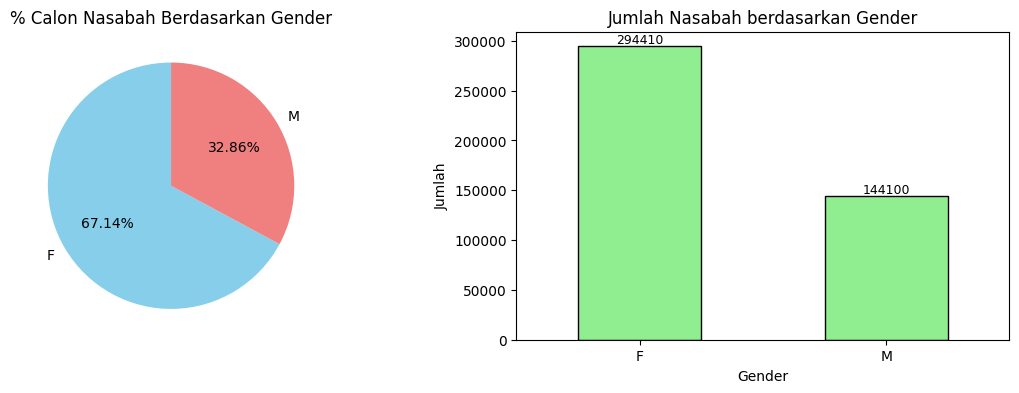

In [30]:
# Data chart
chart_1_data = credit_merged['CODE_GENDER'].value_counts() 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Subplot 1 (Pie Chart): Distribusi Gender
chart_1_data.plot(
    kind='pie',
    autopct='%.2f%%', # Format persentase
    startangle=90,
    ax=axes[0],       # Gambar di subplot pertama (axes[0])
    colors=['skyblue', 'lightcoral'] # Warna kustom
)
axes[0].set_title('% Calon Nasabah Berdasarkan Gender')
axes[0].set_ylabel('')

# Subplot 2 (Bar Chart): Jumlah nasabah berdasarkan gender
chart_1_data.plot(
    kind='bar',
    ax=axes[1],       # Gambar di subplot kedua (axes[1])
    color='lightgreen',
    edgecolor='black'
)
axes[1].set_title('Jumlah Nasabah berdasarkan Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=0) # Pastikan label x tidak berputar

# Data Labels pada Bar Chart
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', fontsize=9, color='black')

Mayoritas pemohon kartu kredit adalah perempuan, dengan jumlah dua kali lebih banyak dibandingkan pemohon laki-laki. Data ini mengindikasikan bahwa bank mungkin secara alami menarik lebih banyak pemohon perempuan, atau kampanye akuisisi/produk yang ada saat ini lebih resonan dengan audiens perempuan.

### Calon debitur dengan sumber penghasilan apa yang paling banyak mengajukan fasilitas CC?

Text(0, 0.5, 'Gender, Sumber Penghasilan')

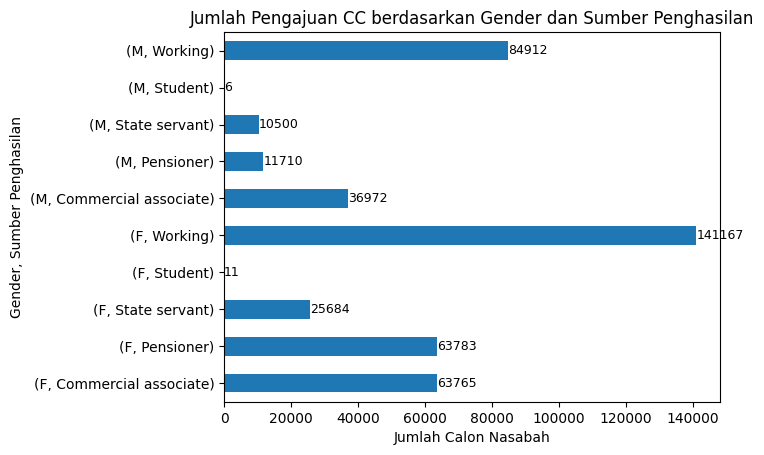

In [31]:
chart_2 = credit_merged.groupby(['CODE_GENDER','NAME_INCOME_TYPE'])['ID'].count().plot(kind='barh')

for container in chart_2.containers:
    chart_2.bar_label(container, fmt='%.0f', fontsize=9, color='black')

plt.title('Jumlah Pengajuan CC berdasarkan Gender dan Sumber Penghasilan')
plt.xlabel('Jumlah Calon Nasabah')
plt.ylabel('Gender, Sumber Penghasilan')

Calon debitur paling banyak merupakan pekerja, baik laki-laki maupun perempuan. Jika tidak memperhatikan jenis kelamin, maka ranking 2 diikuti oleh commercial associate, pensioner, dan state servant (ASN). Ini memberi indikasi bahwa golongan pekerja yang paling banyak membutuhkan credit card.

Baik (F, Student) maupun (M, Student) menunjukkan jumlah pengajuan yang sangat minim, hampir mendekati nol. Ini mungkin karena mahasiswa umumnya memiliki pendapatan terbatas atau tidak stabil, sehingga tidak memenuhi kriteria pengajuan kartu kredit atau memiliki kebutuhan yang berbeda.

**Target Pasar Utama:** Segmen pemohon yang bekerja ("Working"), terutama perempuan yang bekerja, adalah target pasar paling besar dan dominan untuk pengajuan kartu kredit.

**Peluang dan Tantangan**: Ada potensi untuk menganalisis lebih dalam segmen "Commercial associate" dan "Pensioner", terutama yang perempuan, karena mereka juga menyumbang jumlah yang signifikan. Segmen "Student" mungkin bukan target utama untuk produk kartu kredit standar, atau memerlukan produk khusus dengan kriteria yang berbeda.

### Bagaimana distribusi calon debitur berdasarkan status pernikahan?

Text(0, 0.5, 'Gender, Status Keluarga')

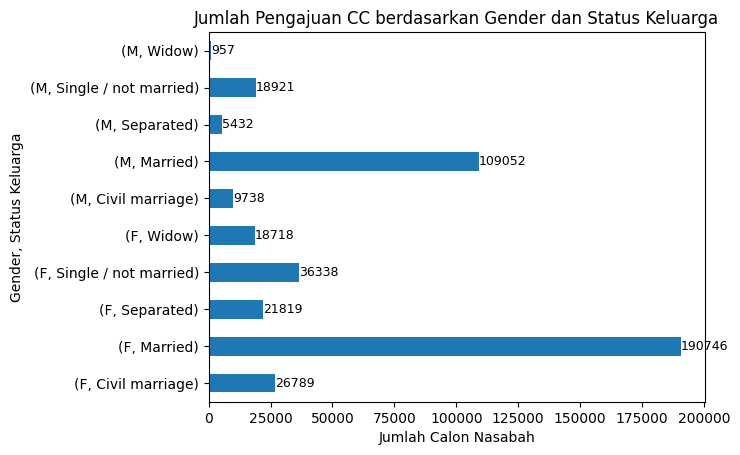

In [32]:
chart_3 = credit_merged.groupby(['CODE_GENDER','NAME_FAMILY_STATUS'])['ID'].count().plot(kind='barh')

for container in chart_3.containers:
    chart_3.bar_label(container, fmt='%.0f', fontsize=9, color='black')

plt.title('Jumlah Pengajuan CC berdasarkan Gender dan Status Keluarga')
plt.xlabel('Jumlah Calon Nasabah')
plt.ylabel('Gender, Status Keluarga')

Secara keseluruhan, pemohon perempuan (F) dengan berbagai status pernikahan memiliki jumlah pengajuan yang lebih tinggi dibandingkan dengan pemohon laki-laki (M) pada status pernikahan yang setara.

Kombinasi (F, Married) memiliki jumlah pengajuan tertinggi, mendekati 200.000. Ini menunjukkan bahwa perempuan yang sudah menikah adalah segmen pemohon terbesar.

Kombinasi (M, Married) juga sangat signifikan, meskipun lebih rendah dari (F, Married), dengan jumlah pengajuan di atas 100.000.

Ini mengindikasikan bahwa individu yang sudah menikah, baik laki-laki maupun perempuan, merupakan mayoritas pemohon.

**Target Pasar Utama:** Segmen perempuan yang sudah menikah adalah target pasar yang paling besar untuk pengajuan kartu kredit.

### Pada rentang usia berapa mereka paling banyak mengajukan kredit?

In [33]:
youngest_age = credit_merged['AGE_YEARS'].min()
oldest_age = credit_merged['AGE_YEARS'].max()

print(f'Youngest age = {youngest_age}')
print(f'Oldest age = {oldest_age}')

Youngest age = 20
Oldest age = 68


Text(0, 0.5, 'Jumlah Pengajuan')

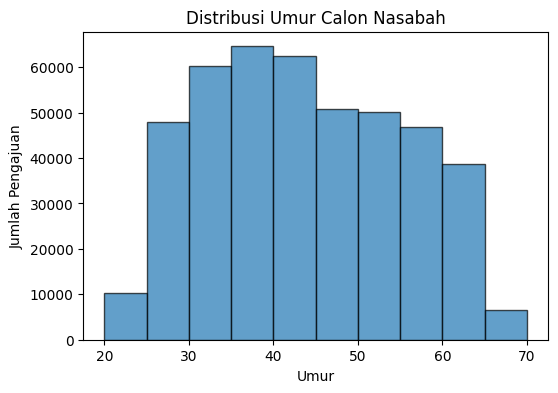

In [34]:
# 1. Mendefinisikan Bin untuk histogram menggunakan interval 5 tahun
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# 2. Ukuran chart
plt.figure(figsize=(6, 4))

# 3. Tampilkan histogram
plt.hist(credit_merged['AGE_YEARS'], bins=age_bins, edgecolor='black', alpha=0.7)

plt.title('Distribusi Umur Calon Nasabah')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pengajuan')


**Insight**

Bagian tertinggi dari histogram berada di sekitar usia 35-45 tahun. Ini berarti mayoritas pemohon aplikasi kredit berada dalam rentang usia produktif ini. Ada puncak yang sangat jelas di sekitar 35-40 tahun dan 40-45 tahun, dengan frekuensi mendekati atau di atas 60.000 pemohon untuk masing-masing bin ini.

Bank tampaknya memiliki daya tarik dari segmen usia 30 hingga 55 tahun sebagai target utama untuk aplikasi kredit, karena ini adalah kelompok usia dengan jumlah pemohon terbanyak.

### Bagaimana kondisi kualitas kredit dan NPL history dari calon nasabah?

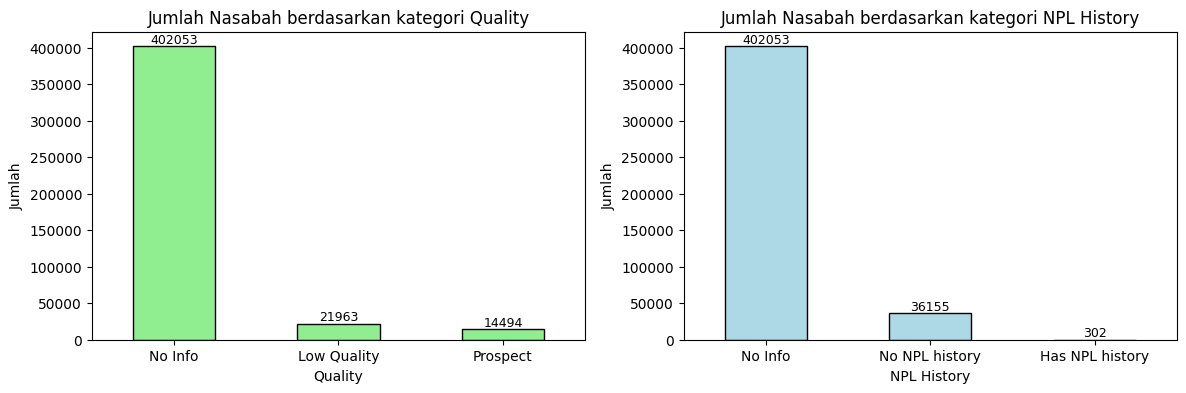

In [35]:
# Data chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Subplot 1 Bar Chart: Quality
credit_merged['QUALITY'].value_counts().plot(
    kind='bar',
    ax=axes[0],       # Gambar di subplot kedua (axes[1])
    color='lightgreen',
    edgecolor='black'
)
axes[0].set_title('Jumlah Nasabah berdasarkan kategori Quality')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=0) # Pastikan label x tidak berputar

# Data Labels pada Bar Chart
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', fontsize=9, color='black')

# Subplot 2 (Bar Chart): Jumlah nasabah berdasarkan gender
credit_merged['NPL_HISTORY'].value_counts().plot(
    kind='bar',
    ax=axes[1],       # Gambar di subplot kedua (axes[1])
    color='lightblue',
    edgecolor='black'
)
axes[1].set_title('Jumlah Nasabah berdasarkan kategori NPL History')
axes[1].set_xlabel('NPL History')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=0) # Pastikan label x tidak berputar

# Data Labels pada Bar Chart
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', fontsize=9, color='black')

Berdasarkan informasi di atas diketahui bahwa sebagain kecil calon nasabah memiliki riwayat kredit di Bank. Sisanya didominasi oleh calon nasabah yang tidak memiliki riwayat kredit (fresh customer).

## Analisis pendukung: Data Credit Record

In [36]:
df_cr_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                45985 non-null  int64 
 1   MONTHS_BALANCE    45985 non-null  int64 
 2   STATUS            45985 non-null  object
 3   LAST_STATUS       45985 non-null  object
 4   NPL_HIST_FLAG     45985 non-null  bool  
 5   NPL_HISTORY       45985 non-null  object
 6   LOW_QUALITY_FLAG  45985 non-null  bool  
 7   QUALITY           45985 non-null  object
dtypes: bool(2), int64(2), object(4)
memory usage: 2.2+ MB


### Bagaimana Kondisi Kolektibilitas Kredit terkini?

Text(0, 0.5, 'Jumlah Nasabah')

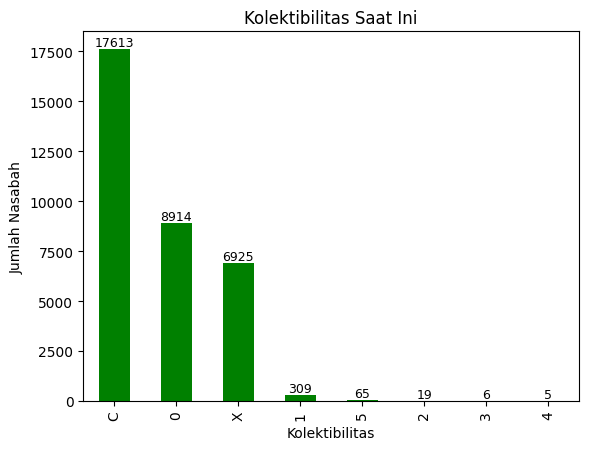

In [37]:
coll_latest = df_cr_ready[df_cr_ready['MONTHS_BALANCE']==0]

coll_freq = coll_latest['LAST_STATUS'].value_counts()
ax = coll_freq.plot(kind='bar', color='green')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, color='black')

plt.title('Kolektibilitas Saat Ini')
plt.xlabel('Kolektibilitas')
plt.ylabel('Jumlah Nasabah')

**Insight**

Hasil di atas menunjukkan hal positif dan tantangan sebagai berikut:
1.  Sebagian besar nasabah memiliki kolektibilitas sangat baik dimana didominasi oleh kuliatas C yang berarti nasabah rajin membayar penuh sesuai tagihan. Kemudian diikuti oleh nasabah dengan kolektibilitas 0 yaitu mereka yang terlambat bayar. 
2.  Nasabah dengan kualitas X juga cukup banyak, yang berarti banyak nasabah tidak menggunakan fasilitas credit card. Dalam kondisi ini bank harus melakukan langkah-langkah agar nasabah X menggunakan fasilitasnya supaya pendapatan dari fee credit card meningkat.

### Bagaimana distribusi nasabah berdasarkan kualitasnya?

Text(0, 0.5, 'Jumlah Nasabah')

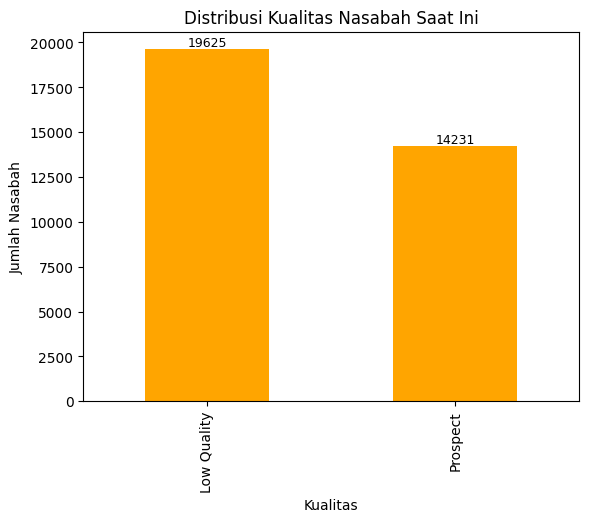

In [38]:
quality = coll_latest['QUALITY'].value_counts()
ax = quality.plot(kind='bar', color='orange')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, color='black')

plt.title('Distribusi Kualitas Nasabah Saat Ini')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah Nasabah')

**Insight**

Hasil di atas menunjukkan hal tantangan sebagai berikut:
1.  Kondisi saat ini, sebagian besar nasabah memiliki kualitas Low Quality yang artinya frekuensi terjadinya riwayat `low colls > good colls`. Meskipun kondisi saat ini sudah jauh membaik. Artinya mereka punya rekam jejak low quality.
2.  Terdapat nasabah prospect dengan jumlah cukup banyak, yang artinya frekuensi terjadinya riwayat `good colls > low colls`. Nasabah Prospect adalah yang wajib dijaga loyalitasnya karena yang paling berkontribusi terhadap kesehatan kredit Bank.

Catatan:

low_quality_coll = ['1', '2', '3', '4', '5', 'X']

good_quality_coll = ['C', '0']

### Bagaimana kondisi riwayat NPL nasabah?

Text(0, 0.5, 'Jumlah Nasabah')

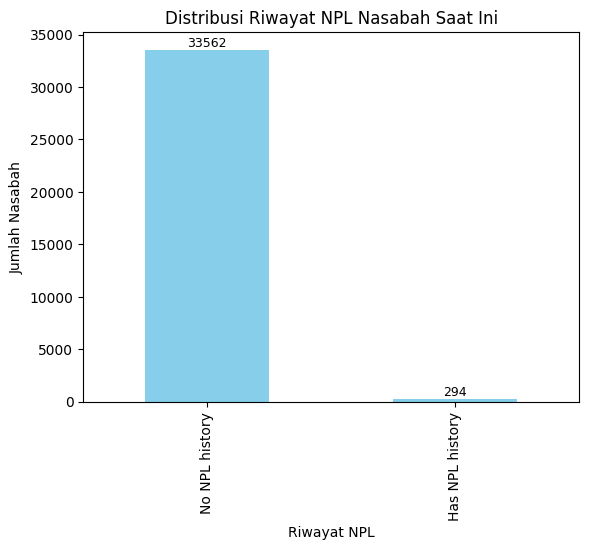

In [39]:
npl_bar = coll_latest['NPL_HISTORY'].value_counts()
ax = npl_bar.plot(kind='bar', color='skyblue')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9, color='black')

plt.title('Distribusi Riwayat NPL Nasabah Saat Ini')
plt.xlabel('Riwayat NPL')
plt.ylabel('Jumlah Nasabah')

**Insight**

Hasil di atas menunjukkan hal positif dan tantangan sebagai berikut:
Kondisi saat ini menunjukkan sebagian besar nasabah tidak memiliki riwayat NPL. Terlihat aneh jika dibandingkan dengan banyaknya nasabah low quality bukan? Namun ini wajar, karena ini mengindikasikan sebagian besar nasabah low quality memiliki kualitas terburuk di Coll 1 dan 2.

Ini bisa diartikan, kualitas nasabah secara umum sudah baik dan harus dipertahankan.

Catatan:

npl_coll = ['3', '4', '5']

## Bagaimana central of tendency income calon nasabah?

Berikut ini akan dicari central of tendency, skewness dan kurtosis test dari income calon nasabah untuk mengetahui bagaimana income ini tersebar atau terpusat. Analisis akan mencakup 

In [53]:
print('Seluruh Nasabah:')
print(f'Mean income calon nasabah: US$ {credit_merged['AMT_INCOME_TOTAL'].mean():,.2f}')
print(f'Median income calon nasabah: US$ {credit_merged['AMT_INCOME_TOTAL'].median():,.2f}')
print(f'Standar deviasi income calon nasabah: US$ {credit_merged['AMT_INCOME_TOTAL'].std():,.2f}')
print(f'Skewness income calon nasabah: {credit_merged['AMT_INCOME_TOTAL'].skew()}')
print(f'Kurtosis income calon nasabah: {credit_merged['AMT_INCOME_TOTAL'].kurt()}')

Seluruh Nasabah:
Mean income calon nasabah: US$ 187,523.90
Median income calon nasabah: US$ 161,100.00
Standar deviasi income calon nasabah: US$ 110,088.09
Skewness income calon nasabah: 8.834605848482992
Kurtosis income calon nasabah: 324.57079666892656


In [55]:
income_female = credit_merged.query("CODE_GENDER == 'F'")

print('Nasabah Perempuan:')
print(f'Mean income calon nasabah: US$ {income_female['AMT_INCOME_TOTAL'].mean():,.2f} per annum')
print(f'Median income calon nasabah: US$ {income_female['AMT_INCOME_TOTAL'].median():,.2f} per annum')
print(f'Standar deviasi income calon nasabah: US$ {income_female['AMT_INCOME_TOTAL'].std():,.2f} per annum')
print(f'Skewness income calon nasabah: {income_female['AMT_INCOME_TOTAL'].skew()}')
print(f'Kurtosis income calon nasabah: {income_female['AMT_INCOME_TOTAL'].kurt()}')

Nasabah Perempuan:
Mean income calon nasabah: US$ 174,522.10 per annum
Median income calon nasabah: US$ 157,500.00 per annum
Standar deviasi income calon nasabah: US$ 95,701.21 per annum
Skewness income calon nasabah: 3.3877682497312467
Kurtosis income calon nasabah: 38.13366304486108


Data pendapatan calon nasabah sangat tidak simetris dan memiliki variasi yang tinggi. Sebagian besar calon nasabah memiliki pendapatan yang relatif rendah atau sedang (tercermin dari median yang lebih rendah), tetapi ada sejumlah kecil calon nasabah dengan pendapatan yang sangat tinggi yang "menarik" rata-rata ke atas dan menciptakan ekor panjang pada distribusi.

Keberadaan outlier berpendapatan tinggi sangat kuat mempengaruhi mean dan standar deviasi.

Hasil ini adalah gambaran mengenai distribusi income, namun apakah income adalah faktor yang berhubungan dengan NPL History? Harus dibuktikan melalui chi-square test.

Dari hasil statistik ini juga kita bisa menghitung credit card limit secara kasar sebagai berikut:

In [68]:
# Calculate estimated credit card limit for female customers
print('Nasabah Perempuan:')
median_income_female_per_annum = income_female['AMT_INCOME_TOTAL'].median()
monthly_income_female = median_income_female_per_annum / 12
debt_to_income_ratio = 0.35

cc_limit_female = monthly_income_female * debt_to_income_ratio

print(f'Median income per annum: US$ {median_income_female_per_annum:,.2f}')
print(f'Median income per month: US$ {monthly_income_female:,.2f}')
print(f'Credit Card Limit (est): US$ {cc_limit_female:,.2f}')


Nasabah Perempuan:
Median income per annum: US$ 157,500.00
Median income per month: US$ 13,125.00
Credit Card Limit (est): US$ 4,593.75


## Apa faktor yang berhubungan dengan NPL History?

Setelah mengetahui distribusi pengajuan kredit dari calon nasabah dan central tendency income calon nasabah, selanjutnya akan dicari tahu apa saja faktor-faktor yang memiliki hubungan signifikan dengan NPL History. Ini sangat penting bagi bank untuk mengetahui faktor-faktor tersebut untuk menjalankan prinsip kehati-hatian mereka.

Apa yang harus dilakukan? Kita akan melakukan analisis korelasi dengan menggunakan Chi-Squared Test. Data yang digunakan adalah data pengajuan nasabah yang memiliki riwayat kredit.

Hipotesis yang dibangun adalah:

$H_0$: A variable dan `NPL_History` adalah independent

$H_1$: A variable dan `NPL_History` adalah dependent

Jika hasil `p-value < 0.05` maka `H0 ditolak`.

In [42]:
sample1 = credit_merged[credit_merged['NPL_HISTORY']!= 'No Info']

a_variabel = sample1[[
  'CODE_GENDER','FLAG_OWN_REALTY', 'FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WORK_YEARS', 'QUALITY', 'INCOME_LEVEL'
  ]]

for col in a_variabel:
  cross = pd.crosstab(sample1[col],sample1['NPL_HISTORY'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "dan kedua variabel dependen" if pval<0.05 else ""
  print(f"P-value of {col} and NPL History: {pval} {prompt}")

P-value of CODE_GENDER and NPL History: 0.05110744260730313 
P-value of FLAG_OWN_REALTY and NPL History: 0.005608938968180894 dan kedua variabel dependen
P-value of FLAG_OWN_CAR and NPL History: 0.39316611069455865 
P-value of NAME_INCOME_TYPE and NPL History: 0.0025790545006247967 dan kedua variabel dependen
P-value of NAME_EDUCATION_TYPE and NPL History: 0.005908046458929081 dan kedua variabel dependen
P-value of NAME_FAMILY_STATUS and NPL History: 0.0001871870724907097 dan kedua variabel dependen
P-value of NAME_HOUSING_TYPE and NPL History: 0.00020225759110957897 dan kedua variabel dependen
P-value of WORK_YEARS and NPL History: 0.03304309520668415 dan kedua variabel dependen
P-value of QUALITY and NPL History: 2.9797796827859936e-45 dan kedua variabel dependen
P-value of INCOME_LEVEL and NPL History: 0.9490104106123152 


**Insight**


Faktor-faktor penting: Kepemilikan properti, tipe pendapatan, tingkat pendidikan, status keluarga, tipe tempat tinggal, kualitas debitur terbukti memiliki hubungan signifikan dengan riwayat NPL. Ini ditunjukkan nilai p-value yang lebih rendah dari 0,05.

Ini berarti bank harus memprioritaskan faktor-faktor ini dalam penilaian risiko kredit mereka. Variabel-variabel ini adalah indikator penting yang dapat membantu bank memprediksi apakah seorang pemohon cenderung memiliki NPL di masa depan.

# Kesimpulan dan Rekomendasi

Berdasarkan seluruh proses yang telah dilakukan, dapat diberikan kesimpulan dan rekomendasi sebagai berikut:

Kesimpulan dan rekomendasi untuk marketing:
1.  Mayoritas pemohon kartu kredit adalah perempuan, dengan jumlah dua kali lebih banyak dibandingkan pemohon laki-laki. Akuisisi/inklusi produk yang ada saat ini lebih resonan dengan audiens perempuan.
2.  Segmen pemohon yang bekerja ("Working"), terutama perempuan yang bekerja, adalah target pasar paling besar dan dominan untuk pengajuan kartu kredit. Ada potensi untuk menganalisis lebih dalam segmen "Commercial associate" dan "Pensioner", terutama yang perempuan, karena mereka juga menyumbang jumlah yang signifikan. Segmen "Student" mungkin bukan target utama untuk produk kartu kredit standar, atau memerlukan produk khusus dengan kriteria yang berbeda.
3. Segmen perempuan yang sudah menikah adalah target pasar yang paling besar untuk pengajuan kartu kredit. 
4. Bank memiliki daya tarik dari segmen usia 30 hingga 55 tahun sebagai target utama untuk aplikasi kredit, karena ini adalah kelompok usia dengan jumlah pemohon terbanyak.

Sehingga bisa diringkas: nasabah perempuan yang bekerja, sudah menikah, dengan rentang umur 30 dan 55 tahun adalah mereka yang paling tertarik mengakuisisi produk credit card bank. Sehingga bagian bisnis bisa melakukan improvisasi terkait fitur-fitur dan fasilitas yang sesuai dengan kondisi tersebut. Tujuannya adalah untuk meningkatkan kepuasan nasabah.


Rekomendasi Manajemen Risiko:

Kepemilikan properti, tipe pendapatan, tingkat pendidikan, status keluarga, tipe tempat tinggal, kualitas debitur terbukti memiliki hubungan signifikan dengan riwayat NPL. Faktor ini harus menjadi prioritas untuk diperhatikan dalam melakukan analisis credit scoring untuk approve credit card karena berhubungan dengan ada atau tidaknya NPL.

# Save to CSV

In [43]:
credit_merged.to_csv('clean_data.csv')